In [ ]:
"""In this notebook we will learn how hyperparameter (HP) tuning is done on neural networks.
Initially we will do HP tuning using simple for loop methods.
In later notebooks we will use improved methods for tuning."""

# We will use MNIST handwritten dataset in this notebook.

# Import necessary packages.
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load mnist dataset from keras.
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
mnist = tf.keras.datasets.mnist
print("MNIST data loaded")
points = []

MNIST data loaded


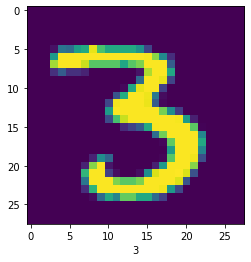

In [ ]:
# how these images look like in matplotlib?
# Taking and viewing 12 th image from the dataset.
plt.imshow(mnist.load_data()[0][0][12])   #, cmap='binary') # these are grayscale images therefore set colour map to binary.
plt.xlabel(mnist.load_data()[0][1][12])   # printing the class label of the image.
plt.show()


In [ ]:
def tune_mnist(num_train_imgs, num_hidden_units, dropout, learning_rate,momentum,epochs, batch_size):
    """For tuning purpose we are taking six HPs into consideration: 
    num_hidden_units, dropout, learning_rate,momentum,epochs and batch_size.
    num_train_imgs refers to total number of training images that we wish to take."""
  num_test_imgs= int(num_train_imgs/10) ## taking only 1/10th number of train images for testing. 
  (xtrain, ytrain), (xtest, ytest) = mnist.load_data()
  xtrain = xtrain[: num_train_imgs] 
  xtest = xtest[:num_test_imgs] 
  ytrain = ytrain[: num_train_imgs]
  ytest = ytest[:num_test_imgs]
  xtrain, xtest = xtrain/255, xtest/255   # normalizing all values between 0 and 1.
  # Let's start build a random neural network.

  model = tf.keras.models.Sequential([   
  tf.keras.layers.Flatten(input_shape=xtrain[0].shape),
  tf.keras.layers.Dense(num_hidden_units, activation=tf.nn.relu),
  tf.keras.layers.Dropout(dropout),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  optimizer = tf.keras.optimizers.SGD(lr=learning_rate,
  momentum=momentum,
  nesterov=True)
  model.compile(optimizer=optimizer,
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])  ## taking accuracy as the evaluation metric.
  
  model.fit(xtrain, ytrain,
  epochs=epochs,
  batch_size=batch_size)
  test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)
  # print("test loss: ", test_loss)
  print("test_acc: ", test_acc)
  points.append((num_train_imgs, num_hidden_units, dropout, learning_rate,momentum,
  epochs, batch_size, test_acc))
  df_points=pd.DataFrame(points, columns=["num_train_imgs", "num_hidden_units", "dropout", "learning_rate","momentum",
  "epochs", "batch_size", "test_acc"])

  return df_points



In [ ]:
#  define search space.
## you can add/remove or edit these parameter values in the list.
space={"num_train_imgs": [100,200] ,
"num_hidden_units":[20,30],
"dropout":[ 0.05],
"learning_rate":[0.01, 0.03],
"momentum":[ 0.2],
"epochs":[5,10],
"batch_size":[4]}


In [ ]:
# The greedy approach goes like this.
# search for all possible combination of the search space and find the accuracy.
# we can make use of for loops in a basic level.

for m in space['num_train_imgs']:
  for n in space['num_hidden_units']:
    for p in space['dropout']:
      for q in space['learning_rate']:
        for w in space['momentum']:
          for u in space["epochs"]:
            for v in space["batch_size"]:
              df=tune_mnist(num_train_imgs=m, num_hidden_units=n, dropout=p,learning_rate=q,momentum=w,epochs=u, batch_size=v)
              print("num_train_imgs: ", m, "num_hidden_units: ", n,
              "dropout: ", p, "learning_rate: ", q, "momentum: ", w,
              "epochs: ", u, "batch_size: ", v)
              print("============ *********** ============ *********** ============ ***********")

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


25/25 [==============================] - 0s 1ms/step - loss: 2.2992 - accuracy: 0.1200
Epoch 2/5
25/25 [==============================] - 0s 962us/step - loss: 2.0528 - accuracy: 0.3300
Epoch 3/5
25/25 [==============================] - 0s 954us/step - loss: 1.8615 - accuracy: 0.4100
Epoch 4/5
25/25 [==============================] - 0s 1ms/step - loss: 1.6536 - accuracy: 0.5000
Epoch 5/5
25/25 [==============================] - 0s 1ms/step - loss: 1.4079 - accuracy: 0.7000
1/1 - 0s - loss: 1.6530 - accuracy: 0.4000 - 88ms/epoch - 88ms/step
test_acc:  0.4000000059604645
num_train_imgs:  100 num_hidden_units:  20 dropout:  0.05 learning_rate:  0.01 momentum:  0.2 epochs:  5 batch_size:  4
============ *********** ============ *********** ============ ***********
Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 2.2414 - accuracy: 0.2000
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 2.0055 - accuracy: 0.3500
Epoch 3/10
25/25 [==============

In [ ]:
## Inorder to find the best parameters at a glance and associated values.
max_val = df.loc[df['test_acc'].idxmax()]
print("Maximum value of column test_accuracy " , " and its corresponding row values:\n", max_val)

Maximum value of column test_accuracy   and its corresponding row values:
 num_train_imgs      200.00
num_hidden_units     20.00
dropout               0.05
learning_rate         0.03
momentum              0.20
epochs                5.00
batch_size            4.00
test_acc              0.80
Name: 10, dtype: float64
